In [1]:
from scipy.spatial.distance      import braycurtis
from IPython.display             import HTML
from Bio                         import AlignIO, SeqIO, Align, Alphabet
from copy                        import deepcopy
from statsmodels.stats.multitest import multipletests
from scipy.stats                 import hypergeom
from collections                 import Counter

import igraph     as ig
import numpy      as np
import seaborn    as sns
import pandas     as pd
import colorlover as cl

import pymc3
import itertools
import multiprocessing
import random
import os
import subprocess
import re
import ete3

In [2]:
%cd ~/work/clusterEvo/new_tests/archaea/

/nobackup1b/users/thiberio/clusterEvo/new_tests/archaea


In [ ]:
dist_matrices = []
group_names   = []

for clst_num in [2, 3, 4, 5]:
    try:
        tmp_matrix = pd.read_csv(f'single_copy_phylogenies/core_genes_from_cluster_{clst_num}-C20.mldist', 
                                  delim_whitespace = True, 
                                  skiprows         = 1, 
                                  header           = None,
                                  index_col        = 0)
    except FileNotFoundError:
        continue
    
    tmp_matrix.columns = tmp_matrix.index
    
    dist_matrices.append(tmp_matrix.copy())
    group_names.append(  clst_num)
    
table = dict(zip(group_names, dist_matrices))

core_matrix = pd.read_csv(f'single_copy_phylogenies/core_genes_from_cluster_all-C20.mldist', 
                          delim_whitespace = True, 
                          skiprows         = 1, 
                          header           = None,
                          index_col        = 0)
core_matrix.columns = core_matrix.index

In [3]:
dist_matrices = []
group_names   = []

for clst_num in [2, 3, 4, 5]:
    try:
        tmp_matrix = pd.read_csv(f'cluster_phylogenies/cluster_{clst_num}-C60.mldist', 
                                  delim_whitespace = True, 
                                  skiprows         = 1, 
                                  header           = None,
                                  index_col        = 0)
    except FileNotFoundError:
        continue
    
    tmp_matrix.columns = tmp_matrix.index
    
    dist_matrices.append(tmp_matrix.copy())
    group_names.append(  clst_num)
    
table = dict(zip(group_names, dist_matrices))

core_matrix = pd.read_csv(f'single_copy_phylogenies/core_genes_from_cluster_all-C60.mldist', 
                          delim_whitespace = True, 
                          skiprows         = 1, 
                          header           = None,
                          index_col        = 0)
core_matrix.columns = core_matrix.index

In [ ]:
dist_matrices = []
group_names   = []

for clst_num in [3, 4, 5]:
    try:
        tmp_matrix = pd.read_csv(f'refined_cluster_phylogenies/cluster_{clst_num}-C20.mldist', 
                                  delim_whitespace = True, 
                                  skiprows         = 1, 
                                  header           = None,
                                  index_col        = 0)
    except FileNotFoundError:
        continue
    
    tmp_matrix.columns = tmp_matrix.index
    
    dist_matrices.append(tmp_matrix.copy())
    group_names.append(  clst_num)
    
table = dict(zip(group_names, dist_matrices))

core_matrix = pd.read_csv(f'single_copy_phylogenies/core_genes_from_cluster_all-C20.mldist', 
                          delim_whitespace = True, 
                          skiprows         = 1, 
                          header           = None,
                          index_col        = 0)
core_matrix.columns = core_matrix.index

In [5]:
%run ~/work/jupyter_notebooks/gene\ family\ distances/correlate_evolution.ipynb

assess_coevolution(dist_matrices[0].copy(), 
                   dist_matrices[1].copy(), 
                   geneIDs=False)[1]

0.8634108417754145

In [ ]:
plt.rcParams.update({'font.size': 22})

tril_indices = np.tril_indices(4, -1)
fig, axs     = plt.subplots(nrows=2, 
                            ncols=3,
                            dpi  =300,
                            figsize=(20, 12))

for ax_count, (clst1_num, clst2_num) in enumerate(itertools.combinations(group_names, 2)):    
    odr, r2 = assess_coevolution(table[clst1_num].copy(), 
                                 table[clst2_num].copy(), 
                                 geneIDs=False)
    
    sns.scatterplot(x    =odr.xplus - odr.delta,
                    y    =odr.y     - odr.eps,
                    ax   =axs[0][ax_count],
                    label=f'wODR $R^2$: {r2:.2f}',
                    color='#2E498A',
                    alpha=0.7)
    
    ax_xlim = axs[0][ax_count].get_xlim()
    ax_ylim = axs[0][ax_count].get_ylim()

    axs[0][ax_count].plot(odr.xplus, 
                          odr.y, 
                          ls   =':',
                          c    ='k',
                          alpha=0.7)
#     sns.lineplot(x=odr.xplus, y=odr.y, ax=axs[0][ax_count])
    
    axs[0][ax_count].legend(handlelength =0, 
                               markerscale  =0, 
                               handletextpad=0)
    axs[0][ax_count].set_xlabel(f'cluster #{clst1_num}', fontweight='bold')
    axs[0][ax_count].set_ylabel(f'cluster #{clst2_num}', fontweight='bold')
    
    axs[0][ax_count].set_xlim( ax_xlim )
    axs[0][ax_count].set_ylim( ax_ylim )

for ax_count, clst_num in enumerate(group_names):
    odr, r2 = assess_coevolution(core_matrix.copy(), 
                                 table[clst_num].copy(), 
                                 geneIDs=False)

    sns.scatterplot(x    =odr.xplus - odr.delta,
                    y    =odr.y     - odr.eps,
                    ax   =axs[1][ax_count],
                    label=f'wODR $R^2$: {r2:.2f}',
                    color='#A43737', 
                    alpha=0.7)

    ax_xlim = axs[1][ax_count].get_xlim()
    ax_ylim = axs[1][ax_count].get_ylim()

    axs[1][ax_count].plot(odr.xplus, 
                          odr.y, 
                          ls   =':',
                          c    ='k',
                          alpha=0.7)

    axs[1][ax_count].legend(handlelength =0, 
                               markerscale  =0, 
                               handletextpad=0)
    axs[1][ax_count].set_xlabel(f'102 core-genes', fontweight='bold')
    axs[1][ax_count].set_ylabel(f'cluster #{clst_num}', fontweight='bold')

    axs[1][ax_count].set_xlim( ax_xlim )
    axs[1][ax_count].set_ylim( ax_ylim )

fig.tight_layout()

# fig.savefig('comparison_between_clustered_core_genes.pdf')

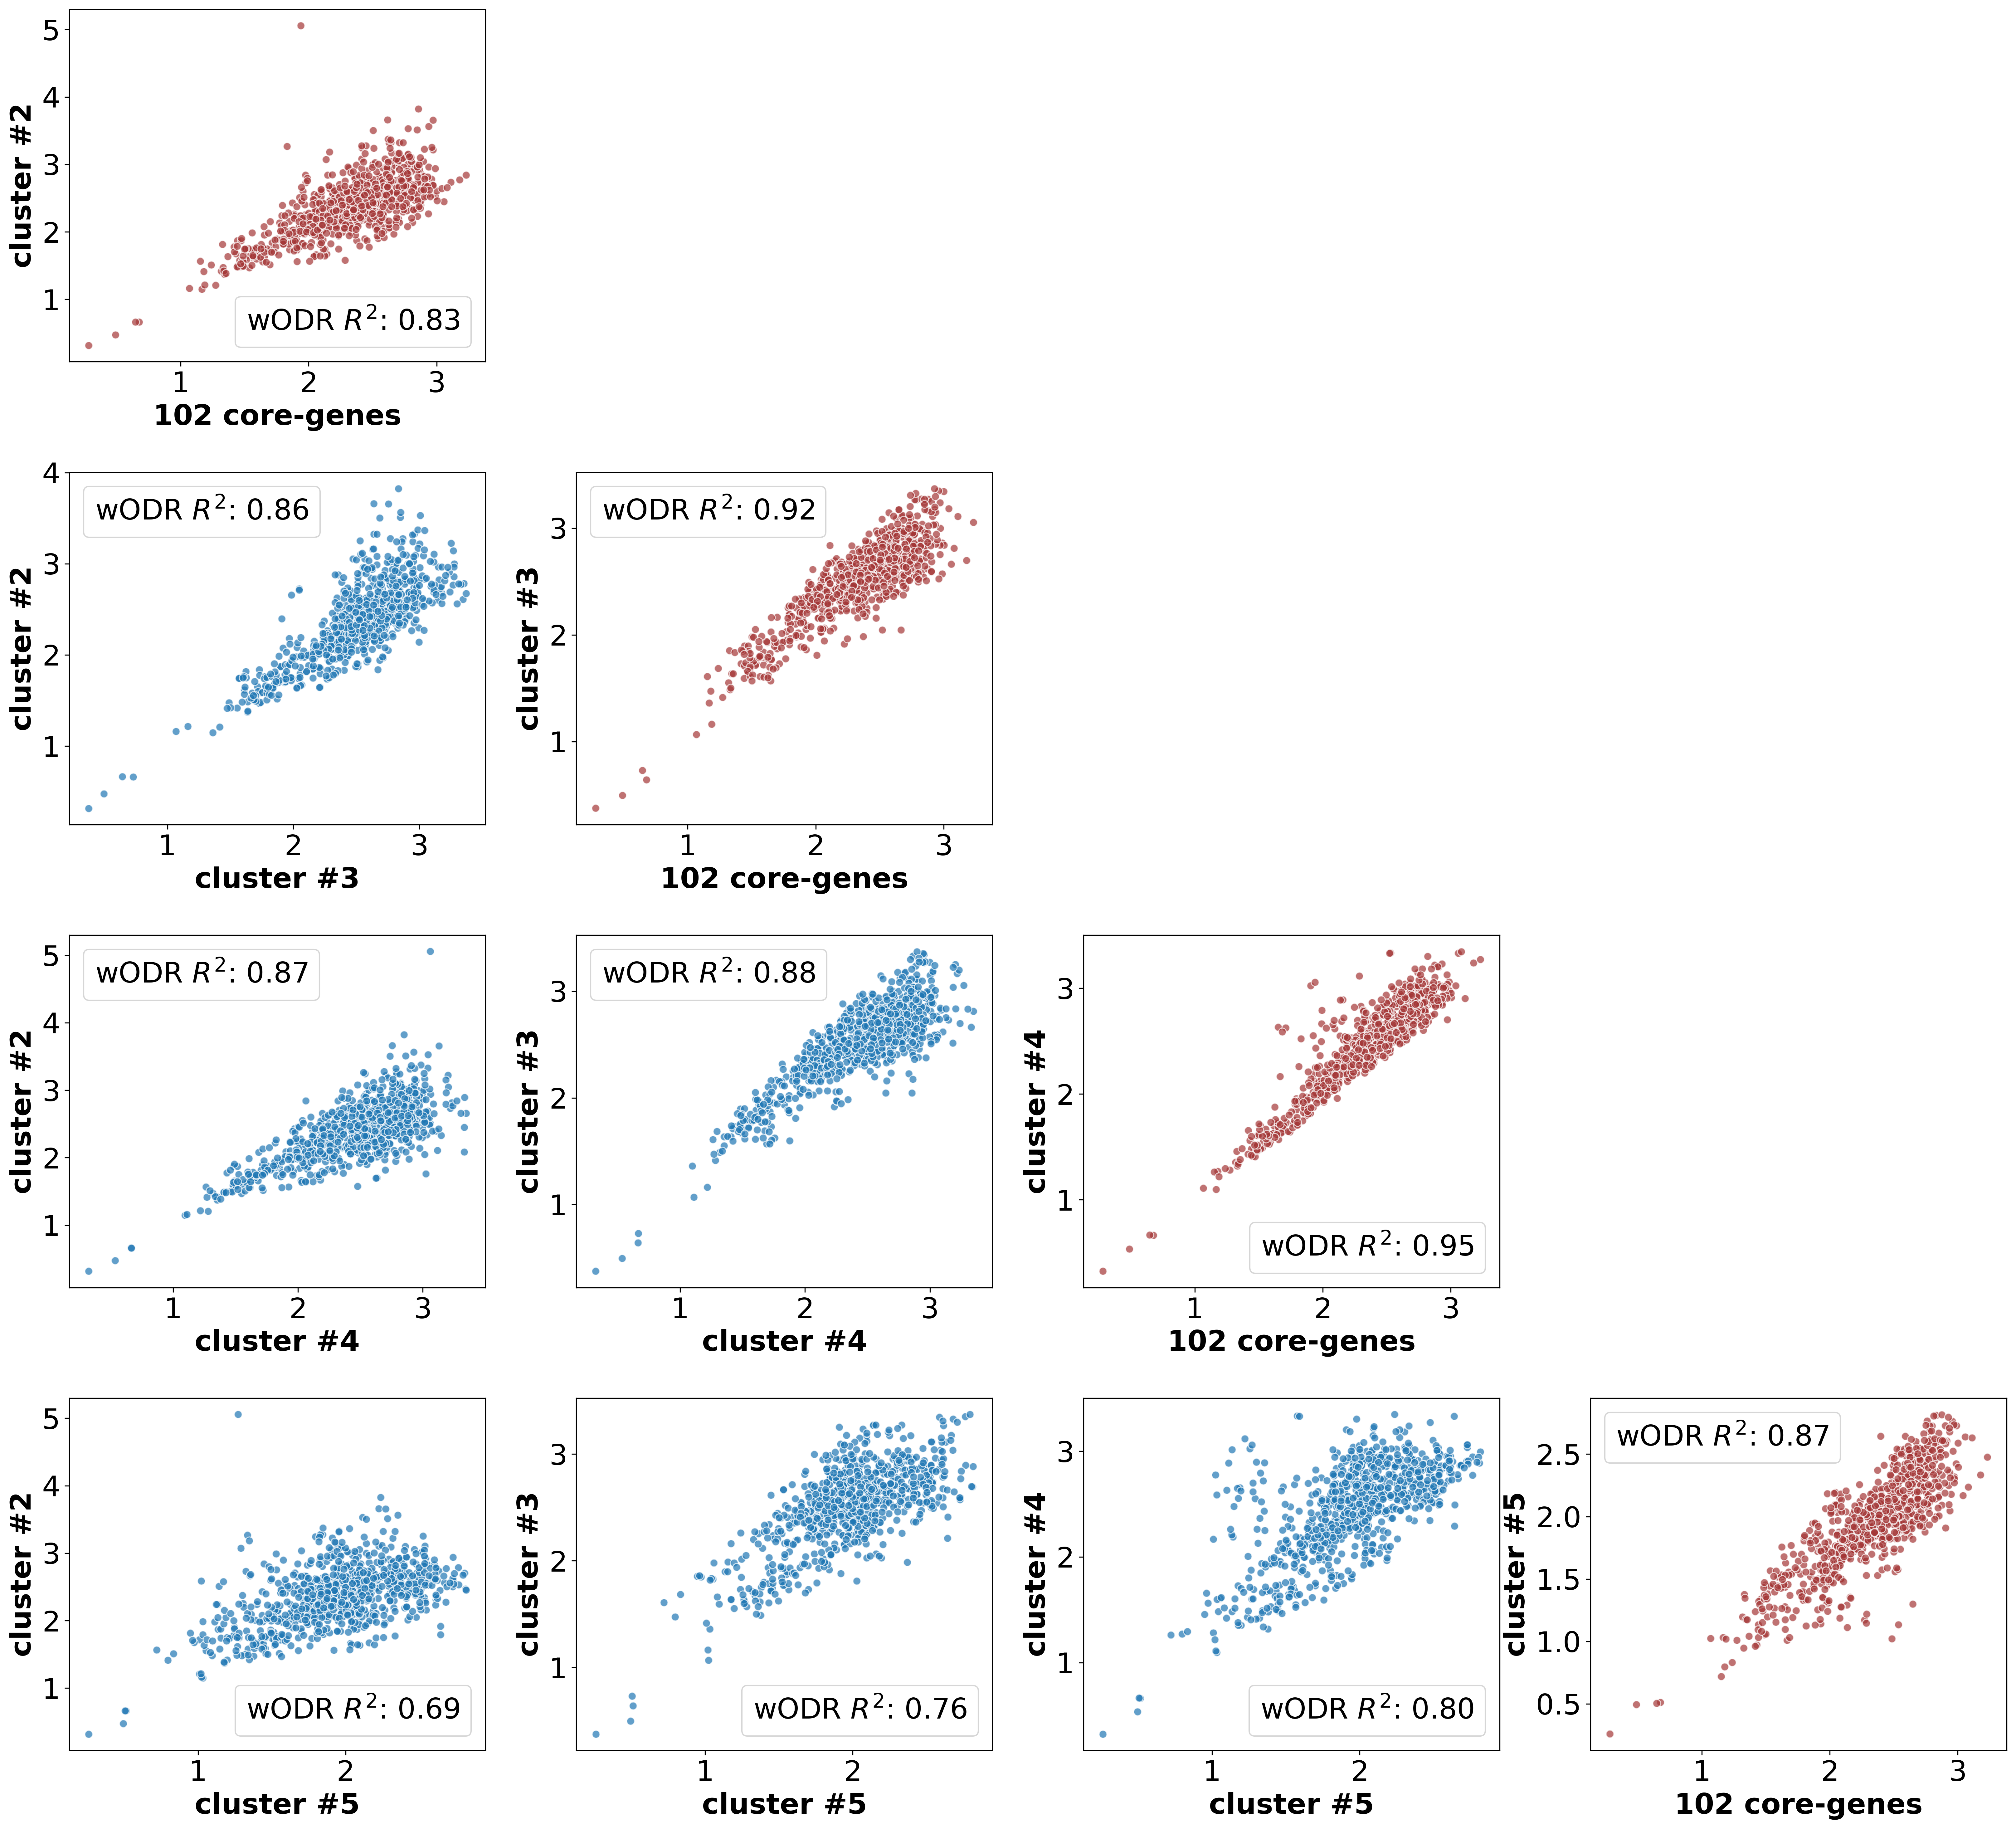

In [6]:
plt.rcParams.update({'font.size': 22})

tril_indices = np.tril_indices(4, -1)
fig, axs     = plt.subplots(nrows=4, 
                            ncols=4,
                            dpi  =300,
                            figsize=(22, 20))

for x_axis, y_axis in zip(*tril_indices):    
    odr, r2 = assess_coevolution(dist_matrices[x_axis].copy(), 
                                 dist_matrices[y_axis].copy(), 
                                 geneIDs=False)
    
    sns.scatterplot(x    =odr.xplus - odr.delta,
                    y    =odr.y     - odr.eps,
                    ax   =axs[x_axis][y_axis],
                    label=f'wODR $R^2$: {r2:.2f}',
#                     label=f'$R^2$: {r2:.2f}',
                    alpha=0.7)
    axs[x_axis][y_axis].legend(handlelength =0, 
                               markerscale  =0, 
                               handletextpad=0)
    axs[x_axis][y_axis].set_xlabel(f'cluster #{group_names[x_axis]}', fontweight='bold')
    axs[x_axis][y_axis].set_ylabel(f'cluster #{group_names[y_axis]}', fontweight='bold')
    
#     sns.kdeplot(odr.delta, shade=True, label='x axis error', ax=axs[y_axis][x_axis])
#     sns.kdeplot(odr.eps, shade=True, label='y axis error', ax=axs[y_axis][x_axis])
    axs[y_axis][x_axis].axis('off')

for position, clst_num in enumerate(group_names):
    odr, r2 = assess_coevolution(core_matrix.copy(), 
                                 table[clst_num].copy(), 
                                 geneIDs=False)

    sns.scatterplot(x    =odr.xplus - odr.delta,
                    y    =odr.y     - odr.eps,
                    ax   =axs[position][position],
                    label=f'wODR $R^2$: {r2:.2f}',
#                     label=f'$R^2$: {r2:.2f}',
                    color='#A43737', 
                    alpha=0.7)
    axs[position][position].legend(handlelength =0, 
                                   markerscale  =0, 
                                   handletextpad=0)
    axs[position][position].set_xlabel(f'102 core-genes',      fontweight='bold')
    axs[position][position].set_ylabel(f'cluster #{clst_num}', fontweight='bold')

fig.tight_layout()

fig.savefig('comparison_between_clustered_genes.pdf')

In [9]:
table[2]['GCA_000349625.1']

0
GCA_009911715.1    3.185426
GCA_008000775.1    2.046426
GCA_000017945.1    2.578184
GCA_000007225.1    2.798292
GCA_000303155.1    1.698729
GCA_008080735.1    2.108427
GCA_000145985.1    2.036472
GCA_000019605.1    3.266080
GCA_005223125.1    2.375761
GCA_000091665.1    2.153122
GCA_001871415.1    2.084464
GCA_003144275.1    2.587643
GCA_000009965.1    2.240776
GCA_000015225.1    2.732563
GCA_000007185.1    2.511254
GCA_000008665.1    2.199924
GCA_000007305.1    2.239825
GCA_000011005.1    2.203328
GCA_000011125.1    3.071556
GCA_000011085.1    2.413134
GCA_000015145.1    2.244406
GCA_000270325.1    1.699554
GCA_000025665.1    2.664112
GCA_011364945.1    1.984453
GCA_000007065.1    2.255536
GCA_000015945.1    2.044950
GCA_000018305.1    2.231947
GCA_013343275.1    2.407746
GCA_000011185.1    2.895284
GCA_000349645.1    2.757136
GCA_013375405.1    1.817589
GCA_000258425.1    2.686782
GCA_002779065.1    2.420489
GCA_003345545.1    1.578496
GCA_000018465.1    1.763983
GCA_000025685.1   